## **Parte 1**: <ins>Absorción de datos y cáculo del % de asistencia</ins>

In [24]:
import pandas as pd

#Damos la ruta de los datos:
csv_file = "data.csv"

In [25]:
#Creamos una función lambda para calcular porcentajes:
porcentaje = lambda x, y: (x*100) / y

#Generamos el DataFrame que vamos a manipular:
df_csv = pd.read_csv(csv_file, header=0)

In [26]:
#Recogemos los datos dependiendo de la presencialidad, sumandolos para poder obtener los totales:
t_teletrabajo = (df_csv["Tipo"] == "Teletrabajo").sum()
t_presencial = (df_csv["Tipo"] == "Presencial").sum()


#Calculamos los días de trabajo totales:
total = t_teletrabajo + t_presencial

In [27]:
#Calculamos % de días de teletrabajo y presencial:
print(f"\nDías totales trabajados: {total}")

#Redondeamos el porcentaje que nos genere la función lambda, y mostramos los resultados:
print(f"\n\tTeletrabajo {round(porcentaje(t_teletrabajo, total),2)}%, {t_teletrabajo} días.")
print(f"\n\tPresencial {round(porcentaje(t_presencial, total),2)}%, {t_presencial} días.")


Días totales trabajados: 224

	Teletrabajo 81.25%, 182 días.

	Presencial 18.75%, 42 días.


## **Parte 2**: <ins>Visualización de datos</ins>

In [28]:
import requests #Peticiones por HTTP
from bs4 import BeautifulSoup #Depuración de HTML
import matplotlib.pyplot as plt #Generación de gráficos

Se han asistido 2 Lunes
Se han asistido 9 Martes
Se han asistido 11 Miércoles
Se han asistido 16 Jueves
Se han asistido 4 Viernes


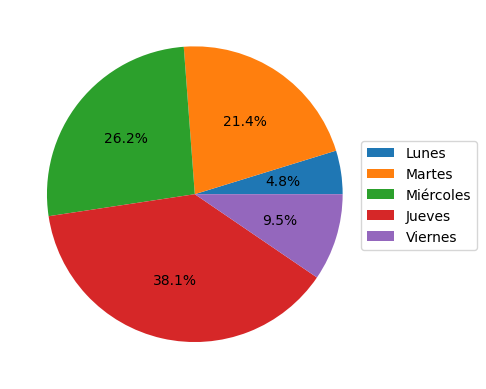

In [29]:
#Generamos un diccionario para hacer un recuento por días:
dic_diaspresenciales = {
    "Lunes":0,
    "Martes":0,
    "Miércoles":0,
    "Jueves":0,
    "Viernes":0
}

#Identificamos qué días del año ha habido presencialidad:
n_diaspresenciales = list(df_csv.loc[df_csv["Tipo"] == "Presencial", "Dia"].values)

#RECOGEMOS LA INFORMACIÓN DE LA WEB
url = "https://www.calendario-365.es/numeros-de-dias/2025.html#google_vignette"

##Texto de la URL
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)


#Recogemos el contenido de las tablas distribuido por días:
days = list(soup.find_all('tr'))

#Procesamos todo excepto el encabezado:
for day in days[1:]:

    #Leemos el contenido de cada día:
    text = list(day.find_all('td'))
    
    #Identificamos el día del año:
    year_day = int(text[0].get_text())
    #Identificamos el día de la semana:
    week_day= text[2].get_text().capitalize()

    #Ahora sumamos +1 al día de nuestro diccionario:
    if year_day in n_diaspresenciales:
        dic_diaspresenciales[week_day] += 1 
    
print(f'Se han asistido {dic_diaspresenciales["Lunes"]} Lunes')
print(f'Se han asistido {dic_diaspresenciales["Martes"]} Martes')
print(f'Se han asistido {dic_diaspresenciales["Miércoles"]} Miércoles')
print(f'Se han asistido {dic_diaspresenciales["Jueves"]} Jueves')
print(f'Se han asistido {dic_diaspresenciales["Viernes"]} Viernes')

#===================================================================
#Construimos un gráfico circular dividido por porciones:
#===================================================================

#Generamos un diccionario con la lista de los días y el total de días asistidos:
pie = {"dias": list(dic_diaspresenciales.keys()), "total": list(dic_diaspresenciales.values())}

#Definimos los ejes del círculo para cada día:
plt.pie(x = pie['total'], autopct='%1.1f%%') 

#Añadimos una leyenda a el gráfico para poder interpretar los datos:
plt.legend(labels = pie['dias'], loc = [0.95, 0.35])

plt.show()
